In [ ]:
# !pip install tensorflow

In [ ]:
import pandas as pd
import IPython.display as display
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
import numpy as np
import os, random
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/DL-Lab/DLProject/Train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)

)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/DL-Lab/DLProject/Test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 161 files belonging to 2 classes.
Found 40 files belonging to 2 classes.


In [ ]:
#Normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
def model():
  model= tf.keras.models.Sequential()
  model.add(Conv2D(8, (3,3), padding='same', activation='relu', input_shape=(256,256,3)))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(16, (3,3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dense(1, activation = 'sigmoid'))

  opt = tf.keras.optimizers.Adam(0.001)
  model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

  return model

In [ ]:
mymodel = model()
mymodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 8)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 16)      1168      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 32)        0

In [ ]:
hist = mymodel.fit_generator(train_ds, epochs=20, validation_data = validation_ds)

Epoch 1/20


<ipython-input-8-2a627501f2ed>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = mymodel.fit_generator(train_ds, epochs=20, validation_data = validation_ds)


6/6 [==============================] - 23s 3s/step - loss: 0.5391 - accuracy: 0.6584 - val_loss: 1.2067 - val_accuracy: 0.5750
Epoch 2/20
6/6 [==============================] - 15s 2s/step - loss: 0.1705 - accuracy: 0.9193 - val_loss: 2.1325 - val_accuracy: 0.5750
Epoch 3/20
6/6 [==============================] - 8s 1s/step - loss: 0.0872 - accuracy: 0.9814 - val_loss: 5.1827 - val_accuracy: 0.4250
Epoch 4/20
6/6 [==============================] - 10s 1s/step - loss: 0.0953 - accuracy: 0.9627 - val_loss: 2.2124 - val_accuracy: 0.5000
Epoch 5/20
6/6 [==============================] - 10s 2s/step - loss: 0.0402 - accuracy: 0.9876 - val_loss: 4.2333 - val_accuracy: 0.5500
Epoch 6/20
6/6 [==============================] - 8s 1s/step - loss: 0.0236 - accuracy: 0.9876 - val_loss: 3.8042 - val_accuracy: 0.5500
Epoch 7/20
6/6 [==============================] - 9s 1s/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 3.5607 - val_accuracy: 0.5500
Epoch 8/20
6/6 [==============================] 

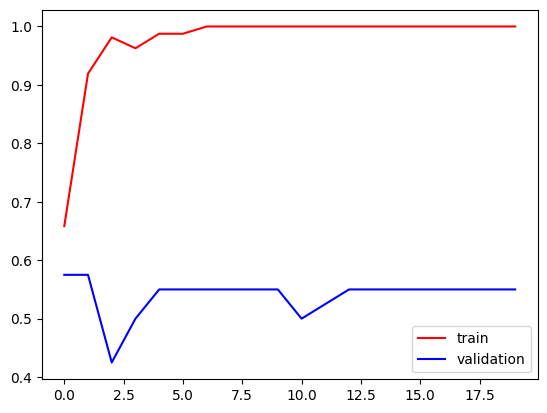

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'], color='red', label='train')
plt.plot(hist.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
Dropout(0.5)

In [ ]:
BatchNormalization()

2/2 [==============================] - 1s 132ms/step - loss: 9.0239 - accuracy: 0.5500
Test: accuracy = 0.550000  ;  loss = 9.023936 
2/2 [==============================] - 1s 101ms/step


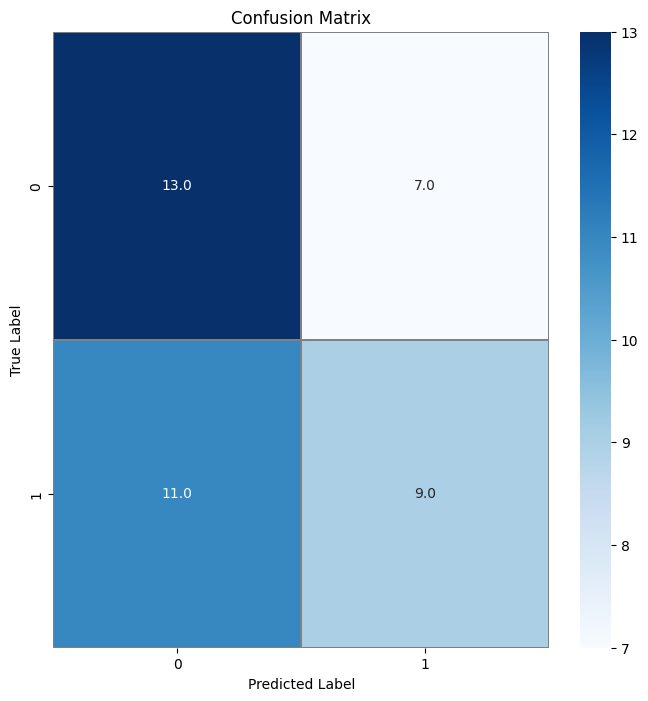

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Predict the values from the validation dataset

loss, accuracy = mymodel.evaluate(validation_ds)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))
y_pred =  mymodel.predict(validation_ds)
y_p = np.where(y_pred > 0.5, 1,0)
test_data=validation_ds.unbatch()
y_g=[]
for image, label in  test_data:
  y_g.append(label.numpy())

confusion_mtx = confusion_matrix(y_g, y_p)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
report = classification_report(y_g, y_p, target_names=['0','1'])
print(report)

              precision    recall  f1-score   support

           0       0.54      0.65      0.59        20
           1       0.56      0.45      0.50        20

    accuracy                           0.55        40
   macro avg       0.55      0.55      0.55        40
weighted avg       0.55      0.55      0.55        40



VGG


In [ ]:
from tensorflow.keras.applications import VGG16

pre_trained_model = VGG16(input_shape=(256,256,3), include_top=False, weights="imagenet")

for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True

last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
x = layers.Flatten()(last_output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(1, activation='sigmoid')(x)

vggmodel = tf.keras.models.Model(pre_trained_model.input, x)

vggmodel.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-4, momentum=0.9),
              metrics=['accuracy'])

vggmodel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
vgghist = vggmodel.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
6/6 [==============================] - 195s 33s/step - loss: 0.7562 - accuracy: 0.5217 - val_loss: 0.6683 - val_accuracy: 0.6250
Epoch 2/10
6/6 [==============================] - 200s 34s/step - loss: 0.6858 - accuracy: 0.6025 - val_loss: 0.6655 - val_accuracy: 0.6250
Epoch 3/10
6/6 [==============================] - 193s 32s/step - loss: 0.5754 - accuracy: 0.7205 - val_loss: 0.7193 - val_accuracy: 0.5000
Epoch 4/10
6/6 [==============================] - 193s 32s/step - loss: 0.4406 - accuracy: 0.8385 - val_loss: 0.6698 - val_accuracy: 0.5750
Epoch 5/10
6/6 [==============================] - 199s 34s/step - loss: 0.3312 - accuracy: 0.8882 - val_loss: 0.6995 - val_accuracy: 0.5250
Epoch 6/10
6/6 [==============================] - 193s 32s/step - loss: 0.3130 - accuracy: 0.8944 - val_loss: 0.6673 - val_accuracy: 0.6000
Epoch 7/10
6/6 [==============================] - 193s 32s/step - loss: 0.2403 - accuracy: 0.9503 - val_loss: 0.6923 - val_accuracy: 0.5750
Epoch 8/10
6/6 [====

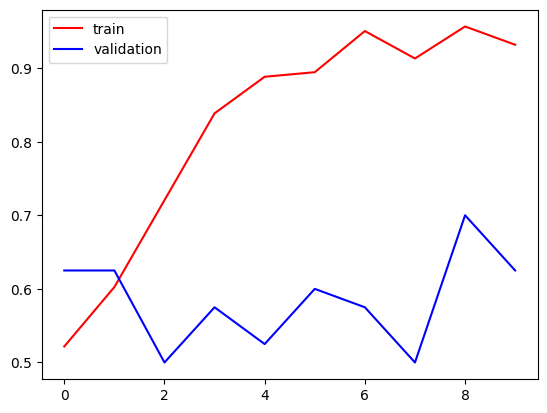

In [ ]:
import matplotlib.pyplot as plt

plt.plot(vgghist.history['accuracy'], color='red', label='train')
plt.plot(vgghist.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

Evaluation

In [ ]:
loss, accuracy = vggmodel.evaluate(validation_ds)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

2/2 [==============================] - 34s 5s/step - loss: 0.6358 - accuracy: 0.6250
Test: accuracy = 0.625000  ;  loss = 0.635841 


In [ ]:
vgg_y_pred =  mymodel.predict(validation_ds)
vgg_y_p = np.where(vgg_y_pred > 0.5, 1,0)

2/2 [==============================] - 1s 121ms/step


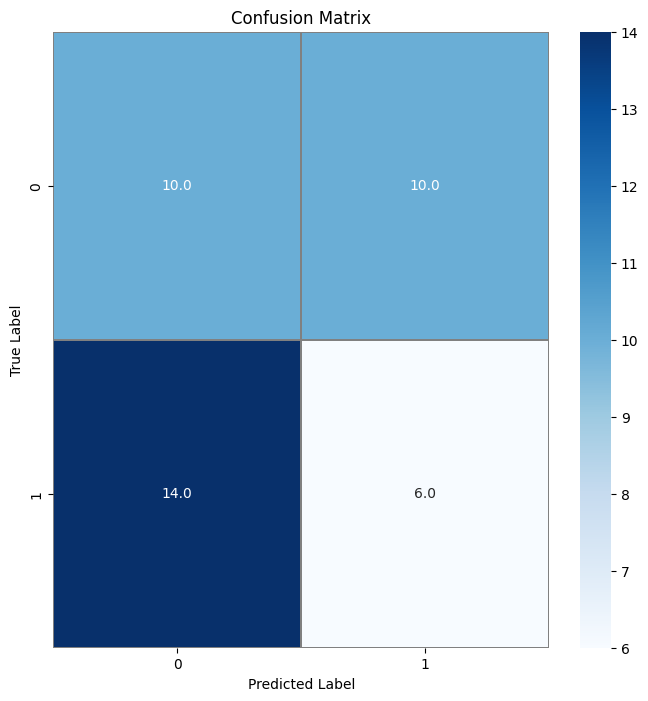

In [ ]:
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_g, vgg_y_p)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
report = classification_report(y_g, vgg_y_p, target_names=['0','1'])
print(report)

              precision    recall  f1-score   support

           0       0.42      0.50      0.45        20
           1       0.38      0.30      0.33        20

    accuracy                           0.40        40
   macro avg       0.40      0.40      0.39        40
weighted avg       0.40      0.40      0.39        40



In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/drive/MyDrive/DL-Lab/DLProject/Test/Fractured/2.jpg')

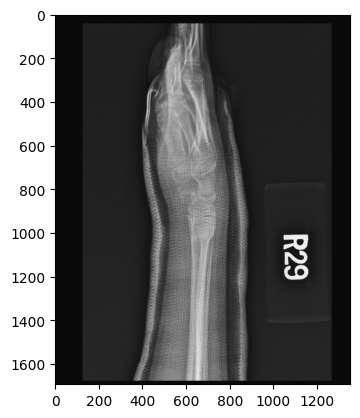

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(1693, 1353, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
result = mymodel.predict(test_input)

1/1 [==============================] - 0s 245ms/step


In [ ]:
result

array([[1.]], dtype=float32)

In [ ]:
if result[0][0]>=0.5:
  prediction = "Fractured"
else:
  prediction = "Not fractured"
print(prediction)

Fractured
